# 합성곱 신경망(CNN)


시간이 너무 걸려서 epochs 수를 500 => 50으로 변경

## 1.1 Min-Max Normalization 데이터 정규화 작업

In [30]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [31]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [32]:
# 데이터 갯수 확인하기
len(train_X), len(test_X), len(train_Y), len(test_Y)

(60000, 10000, 60000, 10000)

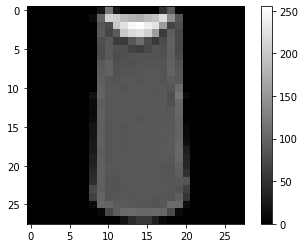

정답 범주:  0


In [33]:
# 이미지 확인하기
import matplotlib.pyplot as plt 
plt.imshow(train_X[2], cmap='gray')
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주: ", train_Y[2])

In [34]:
# 데이터 정규화 이전의 이미지 픽셀 행렬

# print(train_X[2])

최소-최대 정규화(Min-Max Normalization)

- 데이터를 정규화하는 가장 일반적인 방법

- 모든 feature에 대해 각각의 최소값 0, 최대값 1

- 그리고 0과 1 사이의 값으로 변환


$$
\frac{(X - MIN)}{(MAX - MIN)} = \frac{X - 0}{(255 - 0)}
$$


In [35]:
# 최소-최대 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [36]:
# 확인하기

# train_X[2]

## 다층 퍼셉트론에서의 이미지 처리

원본 데이터가 28x28의 2차원 array

Flatten()은 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순 레이어
- input_shape: 원본 데이터의 크기를 입력

Dense 레이어는 완전 연결 레이어

마지막 레이어의 units 값 10, 즉 정답 변수의 수와 동일


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단계

- Adam의 기본값: lr = 0.0001

- sparse_categorical_crossentropy: 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능

    - 희소행렬: 대부분의 값이 0 인 행렬
    
    ex) \[0, 0, 0, 0, 0, 0, 1\], \[0, 0, 0, 0, 1, 0, 0\]

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


신경망 학습 단계

In [40]:
history = model.fit(train_X, train_Y,
                    epochs=50,
                    validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])


Epoch 1/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5277 - accuracy: 0.8167 - val_loss: 0.4512 - val_accuracy: 0.8395
Epoch 2/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3926 - accuracy: 0.8598 - val_loss: 0.3938 - val_accuracy: 0.8555
Epoch 3/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3496 - accuracy: 0.8736 - val_loss: 0.3482 - val_accuracy: 0.8770
Epoch 4/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3237 - accuracy: 0.8818 - val_loss: 0.3432 - val_accuracy: 0.8773
Epoch 5/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.8882 - val_loss: 0.3428 - val_accuracy: 0.8744
Epoch 6/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2877 - accuracy: 0.8932 - val_loss: 0.3282 - val_accuracy: 0.8827
Epoch 7/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2747 - accuracy: 0.8967 - val_loss: 0.3281 - val_accuracy:

정확도 및 손실값에 대한 결과 시각화

- 검증 데이터와 학습 데이터 비교

- 과적합 혹은 과소적합 확인

In [41]:
import matplotlib.pyplot as plt

def history_visualize(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'r--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', label='acc')
    plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

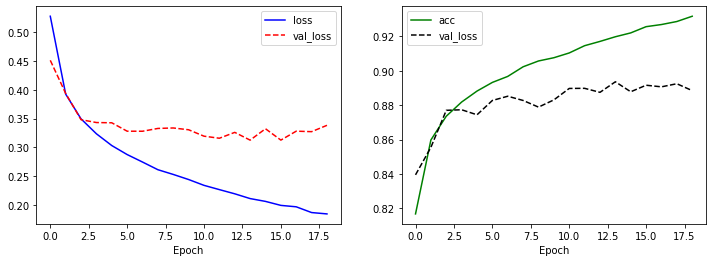

In [42]:
history_visualize(history)

최종 평가

- evaluuate(): 최종 정확도 및 손실값 확인

In [43]:
# model.evaluate(test_X, test_Y)

# loss: 0.3577055758237839, accuracy: 0.8834

예측

- predict(): 학습된 신경망을 활용하여 예측을 수행

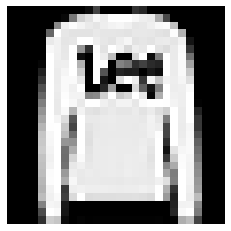

[[1.0001099 1.        1.9988536 1.        1.0006003 1.        1.0004362
  1.        1.        1.       ]]
예측 수행 범주:  2


In [44]:
# 예측 수행
pred = model.predict(test_X[[1]])

# 예측 이미지 확인
plt.imshow(test_X[1], cmap='gray')
plt.axis('off')
plt.show()

# 예측 결과 확인
# 결과를 보기 쉽게 하기 위해서 1을 더해줌
print(pred + 1)
print("예측 수행 범주: ", test_Y[1])


## 1.3 첫 번째 실험 - 합성곱 계층만 활용

- 실험 1. 합성곱 계층만 사용한 경우

- 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용한 경우

- 실험 3. VGGNet 스타일 구축

- 실험 4. 이미지 보강

- 합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수)

- reshape(): 기존 3차원에서 채널이 추가된 4차원 형태로 차원변경


In [45]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [46]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [47]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


분류 대상 이미지 및 범주 확인

- plt.subplot(4, 4, i+1): (행, 열, 순서)

- plt.imshow(train_X[i].reshape(28, 28), cmap='gray'): reshape(28, 28)을 통해 기존의 4차원에서 다시 2차원으로 변경하여 이미지 출력

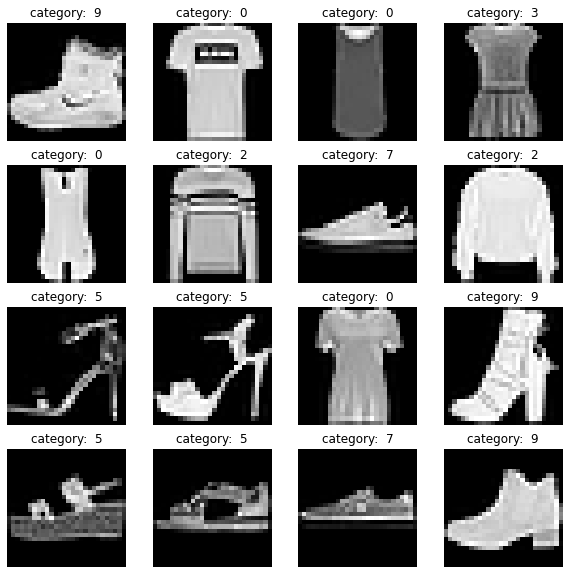

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [48]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"category:  {train_Y[i]}")
    plt.axis('off')

plt.show()
print(train_Y[:16])

### 실험 1. 합성곱 계층만 사용

풀링 레이어 없이 단순 합성곱 계층만 활용

tf.keras.layers.Conv2D()

  - input_shape: 입력 이미지의 크기 및 채널

  - kernel_size: 커널 사이즈

  - filters: 몇 개의 필터를 생성할 것 인지(# 점차 증가하면서 쌓아야 한다.)

  - strides: 건너뛰기(기본값 (1, 1))

  - padding: 패딩 방식(기본값 'valid')

tf.keras.layers.Flatten(): 다차원 레이어를 1차원으로 펼쳐준다.

In [49]:
# 단순 합성곱 계층만 활용
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16, strides=(1, 1), padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단게

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

- '풀링 계층'이 없기 때문에 약 400만개의 파라미터가 생성됨(파라미터가 너무 많다)

신경망 학습 단게

In [52]:
hist = model.fit(train_X, train_Y,
                epochs=50,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4567 - accuracy: 0.8390 - val_loss: 0.4001 - val_accuracy: 0.8475
Epoch 2/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3373 - accuracy: 0.8772 - val_loss: 0.3856 - val_accuracy: 0.8673
Epoch 3/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2834 - accuracy: 0.8967 - val_loss: 0.3886 - val_accuracy: 0.8677
Epoch 4/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2412 - accuracy: 0.9112 - val_loss: 0.4059 - val_accuracy: 0.8718
Epoch 5/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2088 - accuracy: 0.9222 - val_loss: 0.4044 - val_accuracy: 0.8774
Epoch 6/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1823 - accuracy: 0.9318 - val_loss: 0.4977 - val_accuracy: 0.8696
Epoch 7/50
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1658 - accuracy: 0.9389 - val_loss: 0.4754 - val_ac

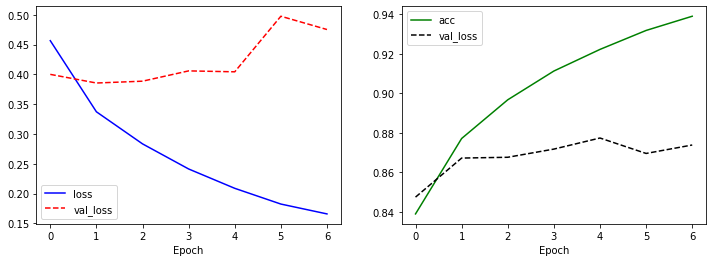

In [53]:
history_visualize(hist)

최종 평가

In [54]:
# model.evaluate(test_X, test_Y)

# loss: 0.506516281402111, accuracy: 0.8684

## 1.4 두 번째 실험 - 합성곱, 풀링, 드랍아웃 활용

합성곱, 풀링, 드랍아웃 활용

- 최대치 풀링: tf.keras.layers.MaxPool2D()

    - strides: 건너뛰기

    - pool size: 풀링 사이즈 설정 - 기본값: (2, 2)

- 평균치 풀링: tf.keras.layers.AveragePool2D()

- 드랍아웃 계층 생성: tf.keras.layers.Dropout()

    - rate: 이전 계층에서 제외할 뉴런의 비율 설정

In [55]:
# 합성곱 계층과 풀링 계층이 번갈아 가며 등장
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2, 2), pool_size=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.AvgPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

컴파일 단계

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

신경망 학습 단계

In [58]:
hist = model.fit(train_X, train_Y,
                epochs=50,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='vall_loss')])

Epoch 1/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5669 - accuracy: 0.7951 - val_loss: 0.4330 - val_accuracy: 0.8394
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4119 - accuracy: 0.8526 - val_loss: 0.3675 - val_accuracy: 0.8637
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3694 - accuracy: 0.8677 - val_loss: 0.3634 - val_accuracy: 0.8709
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3454 - accuracy: 0.8766 - val_loss: 0.3112 - val_accuracy: 0.8857
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3217 - accuracy: 0.8834 - val_loss: 0.3029 - val_accuracy: 0.8901
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3132 - accuracy: 0.8887 - val_loss: 0.3194 - val_accuracy: 0.8835
Epoch 7/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3013 - accuracy: 0.8912 - val_loss: 0.2920 - val_accuracy

정확도 및 손실값에 대한 결과 시각화

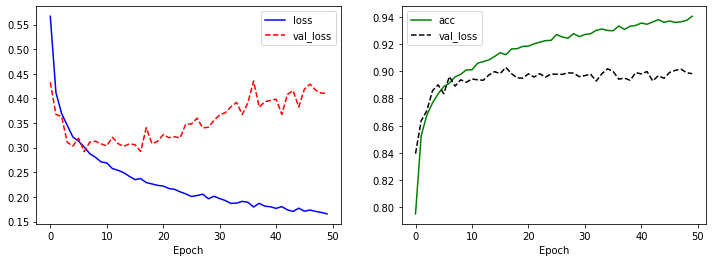

In [59]:
history_visualize(hist)

최종 평가

In [60]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.4355 - accuracy: 0.8946


[0.4355071187019348, 0.894599974155426]

## 1.5 세번째 실험 - VGGNet 스타일 적용

Style Transfer 논문에서도 VGGNet 활용

- VGGNet 스타일 일부 적용

    - 합성곱 계층 2개 적용 / 풀링 레이어 삽입

    - 합성곱 계층 2개 적용 / 풀링 레이어 삽입

    - 완전연결계층 적용

    - 완전연결계층 적용
    
    - 완전연결계층 적용

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'), 
])

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

신경망 학습 단계

In [67]:
hist = model.fit(train_X, train_Y,
                epochs=50,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.6057 - accuracy: 0.7816 - val_loss: 0.3388 - val_accuracy: 0.8761
Epoch 2/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3821 - accuracy: 0.8632 - val_loss: 0.2849 - val_accuracy: 0.8933
Epoch 3/50
1407/1407 [==============================] - 23s 17ms/step - loss: 0.3353 - accuracy: 0.8814 - val_loss: 0.2580 - val_accuracy: 0.9028
Epoch 4/50
1407/1407 [==============================] - 23s 17ms/step - loss: 0.3094 - accuracy: 0.8891 - val_loss: 0.2462 - val_accuracy: 0.9095
Epoch 5/50
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2945 - accuracy: 0.8942 - val_loss: 0.2623 - val_accuracy: 0.9018
Epoch 6/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2826 - accuracy: 0.8986 - val_loss: 0.2338 - val_accuracy: 0.9118
Epoch 7/50
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2687 - accuracy: 0.9054 - val_loss: 0.2231 -

정확도 및 손실값에 대한 결과 시각화

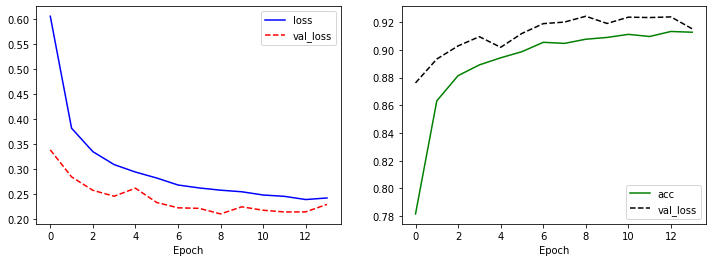

In [68]:
history_visualize(hist)

최종 평가

In [69]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 6ms/step - loss: 0.2491 - accuracy: 0.9098


[0.2491450011730194, 0.9097999930381775]

## 네 번째 실험 - VGGNet + 이미지 보강

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [71]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range = 0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)